In [1]:
import subprocess as subp
import matplotlib.pyplot as plt
import numpy as np
import json
import time

In [2]:
concurrent_clients_tests = [1, 5, 10, 20, 40, 80]

In [3]:
address = "localhost"
tcp_port = "1234"
rcp_port = "8001"
rmq_port = "5672"

In [10]:
# TCP Server
subp.Popen(["go", "run", "./Atividade_3/tcp/tcpServer.go", tcp_port], stdout=subp.DEVNULL)
# RPC Server
subp.Popen(["go", "run", "./Atividade_4/rpcServer.go", rcp_port], stdout=subp.DEVNULL)
# RabbitMQ Server
subp.Popen(["go", "run", "./Atividade_5/rmqServer.go", rmq_port], stdout=subp.DEVNULL)

<Popen: returncode: None args: ['go', 'run', './Atividade_5/rmqServer.go', '...>

In [5]:
for client_num in concurrent_clients_tests:
    print(f"Now testing for {client_num} concurrent clients.")

    json_file_name = f"test_{client_num}.json"

    # TCP Clients
    for i in range(client_num-1):
        subp.Popen(["go", "run", "./Atividade_3/tcp/tcpClient.go", f"{address}:{tcp_port}", "false"],
        stdout=subp.DEVNULL
    )
    # Last client needs to measure time RTT and return it as a mean of durations.
    current_client_num_rtt = subp.check_call(
        ["go", "run", "./Atividade_3/tcp/tcpClient.go", f"{address}:{tcp_port}", "true", f"./Atividade_3/tcp/{json_file_name}"],
        stdout=subp.DEVNULL
    )

Now testing for 1 concurrent clients.
Now testing for 5 concurrent clients.
Now testing for 10 concurrent clients.
Now testing for 20 concurrent clients.
Now testing for 40 concurrent clients.
Now testing for 80 concurrent clients.


In [6]:
for client_num in concurrent_clients_tests:
    print(f"Now testing for {client_num} concurrent clients.")

    json_file_name = f"test_{client_num}.json"

    # RPC Clients
    for i in range(client_num-1):
        subp.Popen(["go", "run", "./Atividade_4/rpcClient.go", f"{address}:{rcp_port}", "false"],
        stdout=subp.DEVNULL
    )
    # Last client needs to measure time RTT and return it as a mean of durations.
    current_client_num_rtt = subp.check_call(
        ["go", "run", "./Atividade_4/rpcClient.go", f"{address}:{rcp_port}", "true", f"./Atividade_4/{json_file_name}"],
        stdout=subp.DEVNULL
    )

Now testing for 1 concurrent clients.
Now testing for 5 concurrent clients.
Now testing for 10 concurrent clients.
Now testing for 20 concurrent clients.
Now testing for 40 concurrent clients.
Now testing for 80 concurrent clients.


In [11]:
for client_num in concurrent_clients_tests:
    print(f"Now testing for {client_num} concurrent clients.")

    json_file_name = f"test_{client_num}.json"

    # RabbitMQ Clients
    for i in range(client_num-1):
        subp.Popen(["go", "run", "./Atividade_5/rmqClient.go", f"{address}:{rmq_port}", "false"],
        stdout=subp.DEVNULL
    )
    # Last client needs to measure time RTT and return it as a mean of durations.
    current_client_num_rtt = subp.check_call(
        ["go", "run", "./Atividade_5/rmqClient.go", f"{address}:{rmq_port}", "true", f"./Atividade_5/{json_file_name}"],
        stdout=subp.DEVNULL
    )

Now testing for 1 concurrent clients.
saiu daqui
tá salvando os arquivos
Now testing for 5 concurrent clients.
saiu daqui
tá salvando os arquivos
Now testing for 10 concurrent clients.
saiu daqui
tá salvando os arquivos
Now testing for 20 concurrent clients.
saiu daqui
tá salvando os arquivos
Now testing for 40 concurrent clients.
saiu daqui
tá salvando os arquivos
Now testing for 80 concurrent clients.
saiu daqui


signal: interrupt
signal: interrupt
signal: interrupt
signal: interrupt
signal: interrupt
signal: interrupt
signal: interrupt
signal: interrupt
signal: interrupt


KeyboardInterrupt: 

In [12]:
file_names = [
    "test_1.json", "test_5.json", "test_10.json",
    "test_20.json", "test_40.json", "test_80.json",
]

concurrent_clients_tcp_rtt = []
concurrent_clients_rpc_rtt = []
concurrent_clients_rmq_rtt = []

In [13]:
for file_name in file_names:
    json_file = open(f"./Atividade_3/tcp/{file_name}", 'r')
    tcp_rtts = json.load(json_file)
    json_file.close()

    json_file = open(f"./Atividade_4/{file_name}", 'r')
    rpc_rtts = json.load(json_file)
    json_file.close()

    json_file = open(f"./Atividade_5/{file_name}", 'r')
    rmq_rtts = json.load(json_file)
    json_file.close()

    mean_tcp_rtt = round((sum(tcp_rtts) / len(tcp_rtts)) / 10000, 2)
    mean_rpc_rtt = round((sum(rpc_rtts) / len(rpc_rtts)) / 10000, 2)
    mean_rmq_rtt = round((sum(rmq_rtts) / len(rmq_rtts)) / 10000, 2)

    concurrent_clients_tcp_rtt.append(mean_tcp_rtt)
    concurrent_clients_rpc_rtt.append(mean_rpc_rtt)
    concurrent_clients_rmq_rtt.append(mean_rmq_rtt)

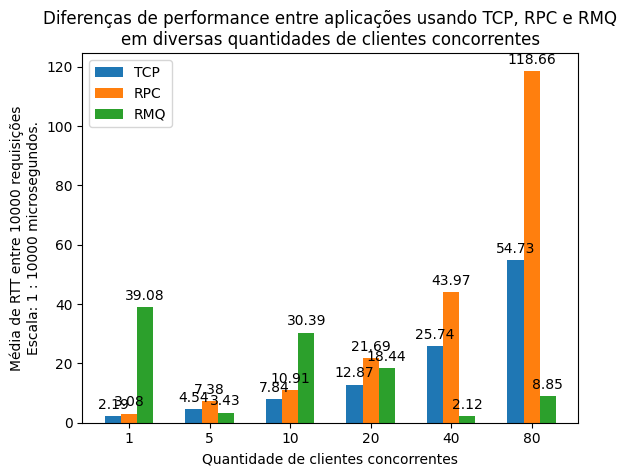

In [22]:
x = np.arange(len(concurrent_clients_tests))  # the label locations
width = 0.2  # the width of the bars
  
tcp_bar = plt.bar(x - width, concurrent_clients_tcp_rtt, width, label = 'TCP')
rpc_bar = plt.bar(x, concurrent_clients_rpc_rtt, width, label = 'RPC')
rmq_bar = plt.bar(x + width, concurrent_clients_rmq_rtt, width, label = 'RMQ')


plt.xticks(x, concurrent_clients_tests)
plt.xlabel("Quantidade de clientes concorrentes")
plt.ylabel("Média de RTT entre 10000 requisições\nEscala: 1 : 10000 microsegundos.")
plt.title("Diferenças de performance entre aplicações usando TCP, RPC e RMQ\nem diversas quantidades de clientes concorrentes")
plt.legend()

plt.bar_label(tcp_bar, padding=3)
plt.bar_label(rpc_bar, padding=3)
plt.bar_label(rmq_bar, padding=3)

plt.savefig("./atv_5_graphs.png")
plt.show()